<a href="https://colab.research.google.com/github/shivanirana-prog/Deep-Learning/blob/master/Bank_Note_Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensor Flow Project**

Data : [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

The data consists of 5 columns:

variance of Wavelet Transformed image (continuous)

skewness of Wavelet Transformed image (continuous)

curtosis of Wavelet Transformed image (continuous)

entropy of image (continuous)

class (integer)

Where class indicates whether or not a Bank Note was authentic

This sort of task is perfectly suited for Neural Networks and Deep Learning!
Tensorflow will be used to predict class of Bank Notes

Install and Import Tensorflow

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf


Import other required libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load data as Dataframe

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank_note_data.csv to bank_note_data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bank_note_data.csv']))  


In [ ]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


**EDA**

Some quick plots to explore data

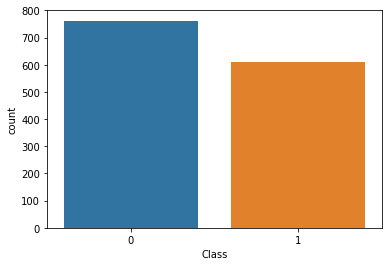

In [ ]:
sns.countplot(x='Class', data = df)

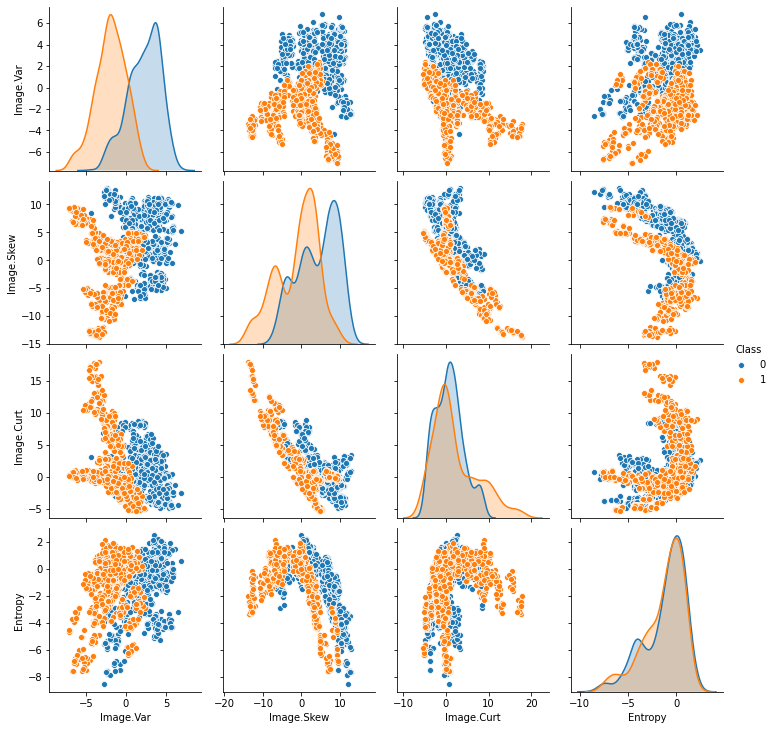

In [ ]:
sns.pairplot(data=df,hue='Class')

**Data Preparation**

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data,

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


Create Train Test Split in Data

In [ ]:
X=df_feat
y=df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

**Tensorflow**

In [ ]:
image_var = tf.feature_column.numeric_column("Image.Var")
image_skew = tf.feature_column.numeric_column('Image.Skew')
image_curt = tf.feature_column.numeric_column('Image.Curt')
entropy =tf.feature_column.numeric_column('Entropy')

In [ ]:
feat_cols = [image_var,image_skew,image_curt,entropy]





**Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [ ]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], n_classes=2,feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpnrbdmq6q', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


**Now create a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True. You can play around with the batch_size parameter if you want, after some trial and error the value comes to 5** 


In [ ]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=5,shuffle=True)

**Now train classifier to the input function. Use steps=30**

In [ ]:
classifier.train(input_fn=input_func,steps=30)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnrbdmq6q/model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 342...
INFO:tensorflow:Saving checkpoints for 342 into /tmp/tmpnrbdmq6q/model.ckpt.
INFO:tensorflow:Calling checkpoint listener

**Model Evaluation**

 Create another pandas_input_fn that takes in the X_test data for x. Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions

In [ ]:
pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

**Use the predict method from the classifier model to create predictions from X_test**

In [ ]:
note_predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnrbdmq6q/model.ckpt-372
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
note_predictions[0]

{'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object),
 'class_ids': array([1]),
 'classes': array([b'1'], dtype=object),
 'logistic': array([0.5234943], dtype=float32),
 'logits': array([0.09404658], dtype=float32),
 'probabilities': array([0.47650564, 0.5234943 ], dtype=float32)}

In [ ]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

**Now create a classification report and a Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,final_preds))

[[176  60]
 [ 65 111]]


In [ ]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       236
           1       0.65      0.63      0.64       176

    accuracy                           0.70       412
   macro avg       0.69      0.69      0.69       412
weighted avg       0.70      0.70      0.70       412



The Model behaves satisfactorily. We can further fine tune the parameters for better results